In [2]:
# 한 셀에서 여러 개 출력가능하도록 설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

디지털 화면은 수많은 점들로 이루어져 있으며, 색상을 가지는 점 하나를 화소(pixel)라고 한다.

<br>

### 디지털 화면에 표시될 이미지를 저장하는 방법

1. 각 픽셀의 색상 값을 저장하는 방식
 - 래스터(rater) 또는 비트맴(bitmap) 방식의 이미지
 - 보통 픽셀 하나 당 각 색상별로 8비트를 사용하여 256가지(0~255)로 색의 감도를 표시
2. 상대적인 점과 선의 위치를 방정식으로 기록했다가 재계산
 - 벡터(vector) 방식의 이미지
 - 깨짐이 없다.


### 색상 값 표현 방식 (color space)

1. RGB값
2. YUV방식
 - 기존 흑백 채널에다가 그보다 1/4의 해상도를 가진 두 색상 채널을 덧붙여서 송출
3. HSV(Hue(색상), Saturation(채도), Value(명도))
 - 직관적이다.
4. CMYK(Cyan, Magenta, Yellow, Black)
 - 인쇄매체에 사용

이러한 **각 컬러 스페이스를 구성하는 단일 축(ex. R, G, B)을 채널(channel)**이라고 한다.

### Pillow 사용법
결국 이미지는 배열 형태의 데이터라는 점을 명심하자.<br>
예를 들어 가로, 세로 각 32픽셀에 RGB 세 가지 색상 채널이 있다면, Numpy로 [32, 32, 3] 차원의 배열을 생성하면 된다.<br>
또한 데이터 타입을 uint8(unsigned 8비트 integer)로 해서 0~255(2의 8승 = 256) 사이의 값을 나타내도록 해야 한다.

`PIL.Image.fromarray()`: 배열을 이미지 객체로 변환 후 화면에 표시

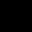

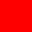

In [3]:
import numpy as np
from PIL import Image

# 모든 채널값을 0으로 초기화 (검정색)
data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

# 모든 채널값을 빨간색으로 설정
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

### 연습문제

#### 1. 가로 세로 각 128 픽셀짜리 흰색 이미지를 만들어 화면에 표시해 봅시다.

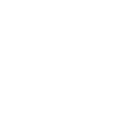

In [8]:
data = np.zeros([128, 128, 3], dtype=np.uint8)
data[:, :] = [255, 255, 255]   # 픽셀에 RGB값 저장
image = Image.fromarray(data, 'RGB')
image

#### 2. 연습용 이미지를 열어 width와 height를 출력하고, .save()를 이용하여 jpg 파일 포맷으로 저장해 봅시다..

In [73]:
from PIL import Image

# 연습용 이미지 경로
image_path = './test_image1.jpg'

# 이미지 열기
img = Image.open(image_path)

# width와 height 출력
print(img.width)
print(img.height)

# JPG 파일 형식으로 저장해보기
new_image_path = './test_image1_1.jpg'
img = img.convert('RGB')
img.save(new_image_path)

4032
3024


#### 3. resize()를 이용하여 이미지 크기를 100, 200으로 변경하여 저장해봅시다

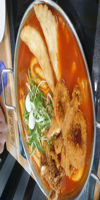

In [11]:
resized_image = img.resize((100, 200))

resized_image_path = './test_image1_1.jpg'
resized_image.save(resized_image_path)
resized_image

#### 4. crop()을 이용하여 일부만 잘라내어 저장해 봅시다.

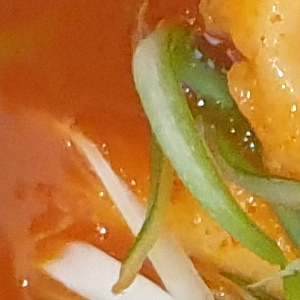

In [75]:
# 좌표는 왼쪽 윗 모서리를 (0,0)으로 잡는다.
# (start_x, start_y, start_x + width, start_y + height) 

box = (1000, 1000, 1300, 1300)
region = img.crop(box)

cropped_image_path = './test_image1_1.jpg'
region.save(cropped_image_path)
region

### OpenCV 라이브러리

[공식문서](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html)

OpenCV는 오픈소스로 제공되는 컴퓨터 비전용 라이브러리이다.<br>
C++, Python, Java, MATLAB 등 다양한 언어에서 호출하여 사용할 수 있으며, 영상 처리에 대한 다양한 고급 기능들이 사용하기 쉽도록 구현되어 있다.<br><br>

**이미지는 결국 [너비, 높이, 채널] 형태를 가지는 배열**이고, 컴퓨터 비전이란 결국 이러한 배열 형태의 데이터를 처리하는 것이 중요한 분야이다.<br><br>

### 예제1)

이 예제에서는 CIFAR-100 이미지를 읽어 들이고, 파란색을 찾기 쉽도록 컬러스페이스를 BGR(RGB)에서 HSV로 변환한 뒤, 해당 색상과 맞는 영역만 표시하는 작업이 진행됩니다.<br>
[Why do we convert RGB to HSV?](https://www.quora.com/Why-do-we-convert-RGB-to-HSV)

**OpenCV에서는 RGB가 아닌 BGR 순서를 사용한다.** <br>
[왜 OpenCV는 BGR 포맷을 쓸까?](https://blog.xcoda.net/102)

In [52]:
import os
import pickle
from PIL import Image

dir_path = 'C:/Users/seenw/Pictures/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')    # train에 CIFAR-100이미지를 딕셔너리로 로드

print(type(train))
print(len(train))
#print(train)

<class 'dict'>
5


In [54]:
train.keys()               

type(train[b'filenames'])

train[b'filenames'][0:5]

train[b'data'][0:5]

train[b'data'][0].shape

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

list

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

(3072,)

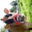

In [58]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image

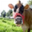

In [59]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [60]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = 'C:/Users/seenw/Pictures/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = dir_path + '/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [04:52<00:00, 171.14it/s]


### 연습문제


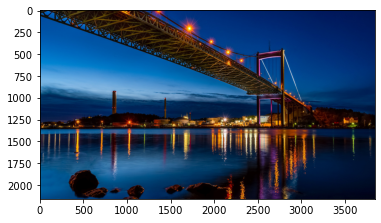

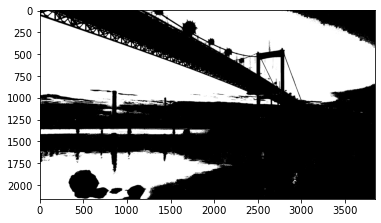

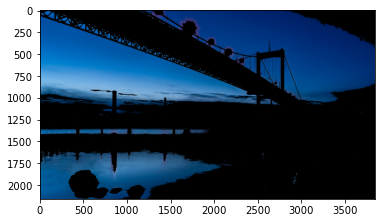

In [48]:
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = './cv_practice.jpg'
img = cv.imread(img_path)                   # cv.imread(): 이미지파일을 읽어온다.

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)    # cv.cvtColor(): 컬러스페이스 변환

# define range of blue color in HSV
# [색상, 채도, 명도]
lower_blue = np.array([100,100,100])        # HSV방식에서의 파란색 범위 시작
upper_blue = np.array([130,255,255])        # HSV방식에서의 파란색 범위 끝

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)       # 설정한 범위를 기준으로 mask는 픽셀마다 1 또는 0을 값으로 가진다.
                                                     # 따라서 (width, height, 1)의 크기를 갖는다.

# Bitwise-AND mask and original image
res = cv.bitwise_and(img,img, mask= mask)            # 두 이미지에 대해 'and'비트연산 수행. 이미지에 mask를 적용한 결과.

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

# cv.imshow(res) 도 PIL.Image.show(), plt.imshow()와 마찬가지로 이미지를 화면에 표시해 줍니다.

OpenCV는 pip으로 설치 시 opencv-python이라는 이름으로 설치해야 하는데, import할 때는 cv2라는 이름을 씁니다. 하지만 실제 최신 버전은 4.x대입니다.

## 실습: CIFAR-100 이미지 중 비슷한 이미지 찾아내기

In [61]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = 'C:/Users/seenw/Pictures/cifar-100-python/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [62]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

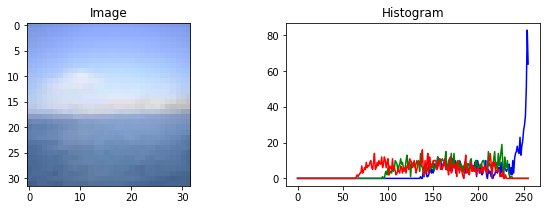

In [63]:
draw_color_histogram_from_image('adriatic_s_001807.png')

### 프로그램 설계

- 프로그램이 실행된다.


build_histogram_db()

- CIFAR-100 이미지들을 불러온다.
- CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
- 입력 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리를 반환한다.

<br>

- CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택한다.

search()
- 입력 이미지 히스토그램과 CIFAR-100 이미지들의 히스토그램을 가진 딕셔너리를 입력으로 받는다. 
- OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 CIFAR-100 이미지들의 히스토그램 간 유사도를 계산한다.
- 이미지이름을 키로 하고, 유사도를 값으로 하는 딕셔너리에 결과를 저장한다.
- 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
- 유사도 순서상으로 상위 5개 이미지를 고른다.

<br>

- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

In [64]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [65]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|███████████████████████████████████████████████████████████████████████████| 49999/49999 [02:47<00:00, 298.58it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [67]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: squirrel_s_002343.png


array([[0.08507997],
       [0.14088511],
       [0.38697663],
       [0.3238528 ],
       [0.06495353],
       [0.12899221],
       [0.46748242],
       [0.27536637],
       [0.05580514],
       [0.19486058],
       [0.59464496],
       [0.09148384]], dtype=float32)

In [68]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

result = search(histogram_db, target_histogram)
result

100%|████████████████████████████████████████████████████████████████████████| 49999/49999 [00:00<00:00, 150652.73it/s]


{'squirrel_s_002343.png': 0.0,
 'seal_s_000350.png': 0.0779183006711807,
 'banded_gecko_s_000531.png': 0.0788932478466728,
 'smoke_s_000442.png': 0.0979407288940176,
 'lift_bridge_s_000261.png': 0.09917104181102575}

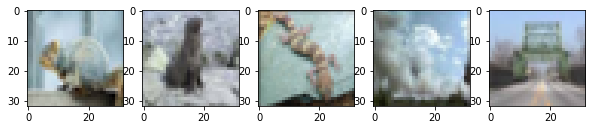

In [69]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)
        
show_result(result)

이미지 파일명을 입력하세요: squirrel_s_002343.png


100%|████████████████████████████████████████████████████████████████████████| 49999/49999 [00:00<00:00, 189868.60it/s]


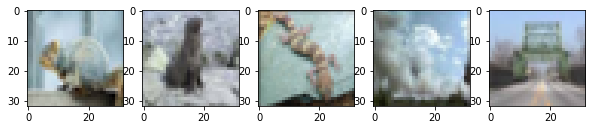

In [71]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)